<a href="https://colab.research.google.com/github/kvinne-anc/Data-Science-Notebooks/blob/main/Explanatory_Visualizations_A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












In [ ]:
# Lesson replication commencing 
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [ ]:
url = 'https://raw.githubusercontent.com/austinlasseter/pandas_visualization/master/data/titanic.csv'
titanic = pd.read_csv(url)
titanic.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,Southampton
1,1,1,female,38.0,71.2833,Cherbourg
2,1,3,female,26.0,7.9250,Southampton
3,1,1,female,35.0,53.1000,Southampton
4,0,3,male,35.0,8.0500,Southampton


In [ ]:
titanic['Pclass'].value_counts().sort_index()

1    184
2    173
3    355
Name: Pclass, dtype: int64

In [ ]:
titanic['cabin_class'] = titanic['Pclass'].map({1:'first', 2:'second', 3:'third'})
titanic.sample(5)

,Survived,Pclass,Sex,Age,Fare,Embarked,cabin_class
151,0,2,male,19.0,13.00,Southampton,second
592,0,3,male,16.0,20.25,Southampton,third
360,1,1,male,52.0,30.50,Southampton,first
426,1,1,female,22.0,49.50,Cherbourg,first
123,0,3,male,40.5,14.50,Southampton,third


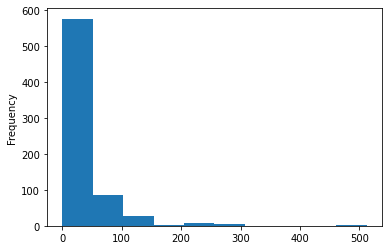

In [ ]:
titanic['Fare'].plot(kind='hist');

In [ ]:
print(titanic.shape)
titanic=titanic[titanic['Fare']<500]
print(titanic.shape)

(712, 7)
(709, 7)


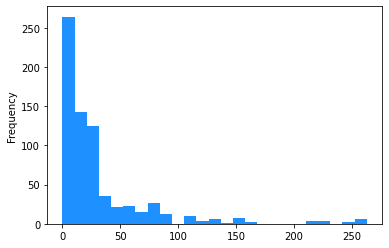

In [ ]:
titanic['Fare'].plot(kind='hist', color='dodgerblue', bins=25);

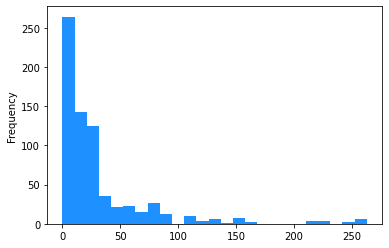

In [ ]:
titanic['Fare'].plot(kind='hist', color='dodgerblue', bins=25);

In [ ]:
titanic['Fare'].describe()

count    709.000000
mean      32.545692
std       42.931277
min        0.000000
25%        8.050000
50%       15.500000
75%       32.320800
max      263.000000
Name: Fare, dtype: float64

In [ ]:
farelabels = ['low', 'medium', 'high', 'vhigh']
titanic['fare_groups'] = pd.cut(titanic['Fare'], bins=[0,8,15,32,264], labels=farelabels)
titanic[['Fare', 'fare_groups']].head()

,Fare,fare_groups
0,7.2500,low
1,71.2833,vhigh
2,7.9250,low
3,53.1000,vhigh
4,8.0500,medium


In [ ]:
fare_results = titanic['fare_groups'].value_counts().sort_index()

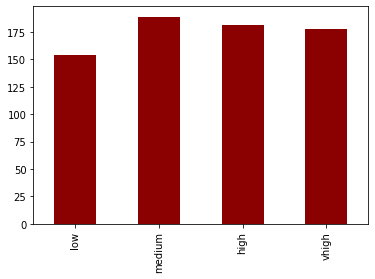

In [ ]:
fare_results.plot(kind='bar', color='darkred');

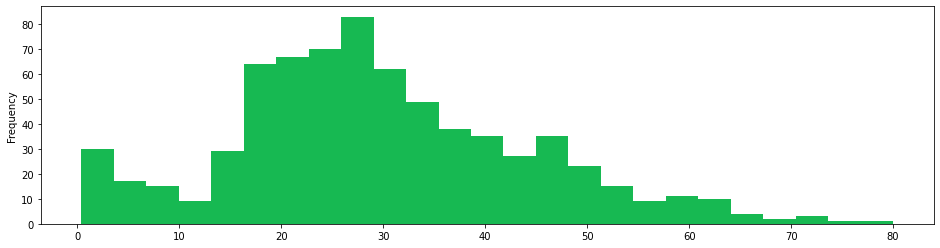

In [ ]:
titanic['Age'].plot(kind='hist',
                    bins=25,
                    figsize=(16,4),
                    color='#17B952');

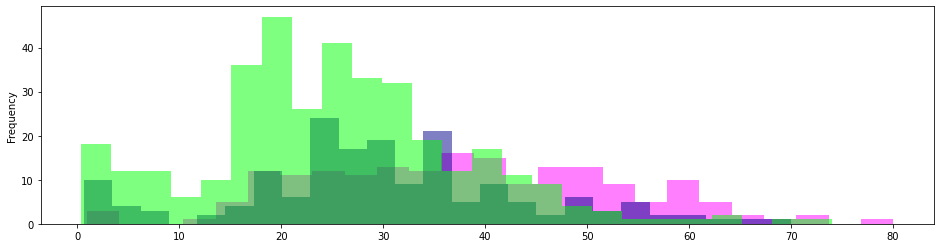

In [ ]:
titanic[titanic['Pclass']==1]['Age'].plot(kind='hist', bins=25, figsize=(16,4), color='magenta', alpha=0.5)
titanic[titanic['Pclass']==2]['Age'].plot(kind='hist', bins=25, figsize=(16,4), color='darkblue', alpha=0.5)
titanic[titanic['Pclass']==3]['Age'].plot(kind='hist', bins=25, figsize=(16,4), color='lime', alpha=0.5);

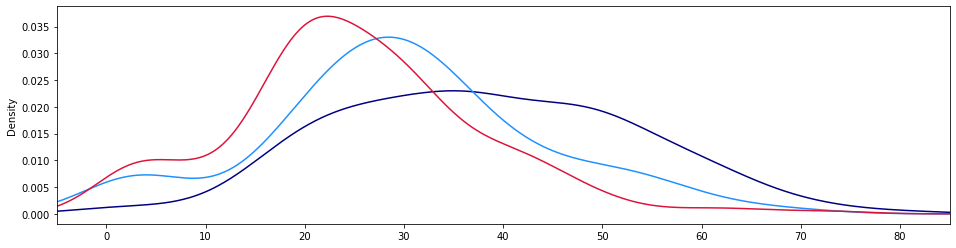

In [ ]:
titanic[titanic['Pclass']==1]['Age'].plot(kind='density', figsize=(16,4), color='navy', xlim=(-5, 85));
titanic[titanic['Pclass']==2]['Age'].plot(kind='density', figsize=(16,4), color='dodgerblue', xlim=(-5, 85));
titanic[titanic['Pclass']==3]['Age'].plot(kind='density', figsize=(16,4), color='crimson', xlim=(-5, 85));

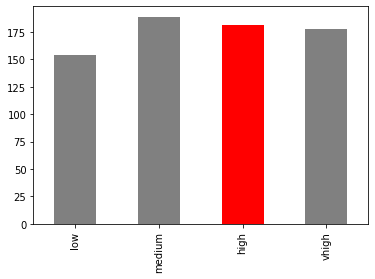

In [ ]:
titanic['fare_groups'].value_counts().sort_index().plot(kind='bar', color=['gray', 'gray', 'red', 'gray']);

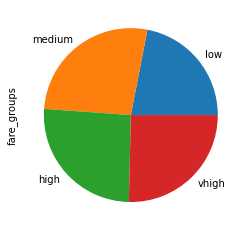

In [ ]:
titanic['fare_groups'].value_counts().sort_index().plot(kind='pie', figsize=(4,4));

In [ ]:
cab_death = pd.crosstab(titanic['cabin_class'], titanic['Survived'])
cab_death

Survived,0,1
cabin_class,,
first,64,117
second,90,83
third,270,85


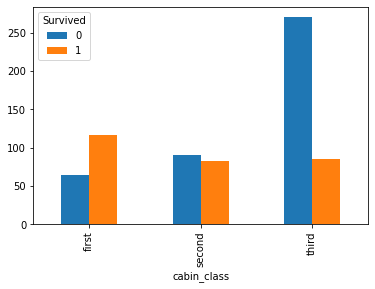

In [ ]:
cab_death.plot(kind='bar');

In [ ]:
cab_death1 = pd.crosstab(titanic['cabin_class'], titanic['Survived'], normalize='columns')
cab_death1

Survived,0,1
cabin_class,,
first,0.150943,0.410526
second,0.212264,0.291228
third,0.636792,0.298246


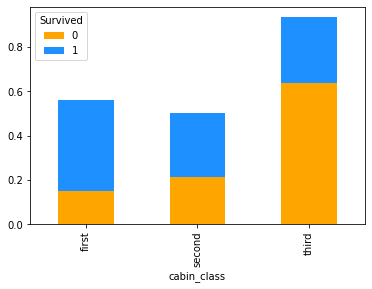

In [ ]:
cab_death1.plot(kind='bar', stacked=True, color=['orange', 'dodgerblue']);

In [ ]:
cab_death2 = pd.crosstab(titanic['cabin_class'], titanic['Survived'], normalize='index')
cab_death2

Survived,0,1
cabin_class,,
first,0.353591,0.646409
second,0.520231,0.479769
third,0.760563,0.239437


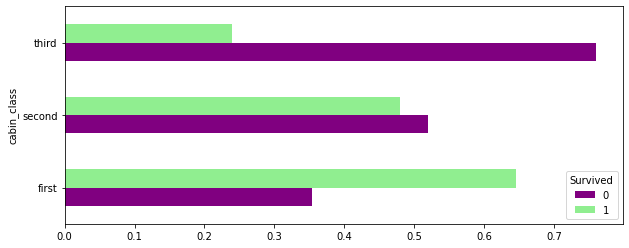

In [ ]:
cab_death2.plot(kind='barh', color=['purple', 'lightgreen'], figsize=(10,4));

In [ ]:
titanic['Age'].describe()
titanic['Age'].mean()
titanic['Age'].median()
titanic['Age'].std()
titanic['Age'].describe()

count    709.000000
mean      29.618011
std       14.518828
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [ ]:
cab_age = titanic.groupby('cabin_class')['Age'].mean()
cab_age

cabin_class
first     38.151492
second    29.877630
third     25.140620
Name: Age, dtype: float64

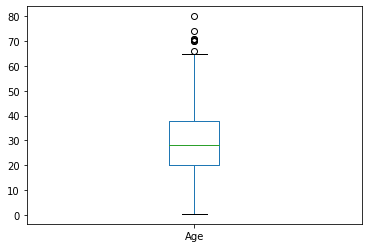

In [ ]:
titanic['Age'].plot(kind='box');

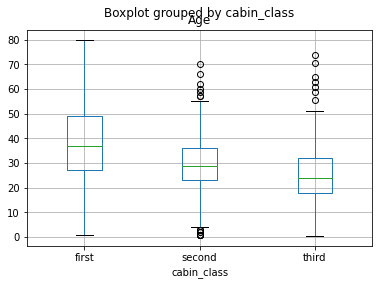

In [ ]:
plt.style.use('fast')
titanic.boxplot(column='Age', by='cabin_class');

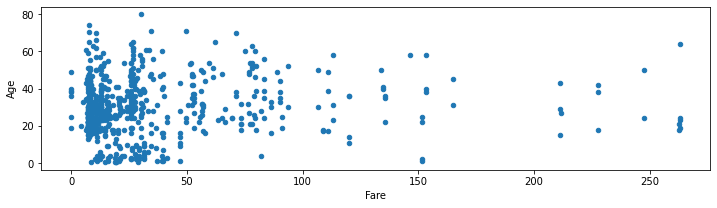

In [ ]:
titanic.plot(kind='scatter', x='Fare', y='Age', figsize=(12,3));

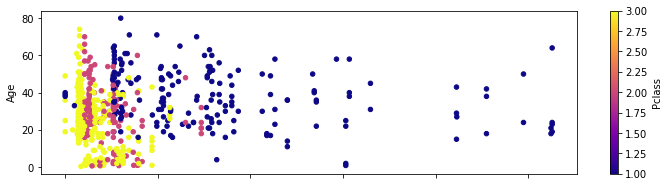

In [ ]:
plt.style.use('fast')
titanic.plot(kind='scatter', x='Fare', y='Age', c='Pclass', colormap='plasma', figsize=(12,3));

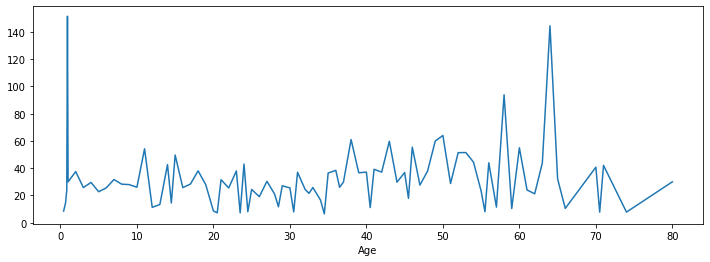

In [ ]:
titanic.groupby('Age')['Fare'].mean().plot(kind='line', figsize=(12,4));

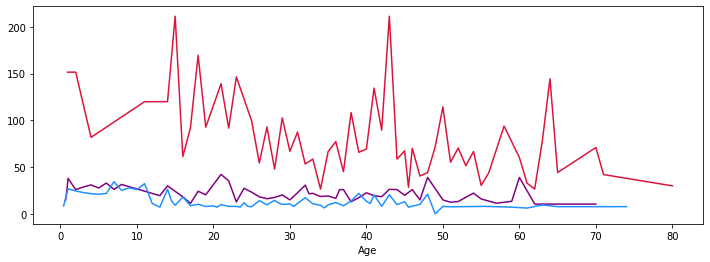

In [ ]:
mycolors=['crimson', 'purple', 'dodgerblue']
for x in [1,2,3]:
  titanic[titanic['Pclass']==x].groupby('Age')['Fare'].mean().plot(figsize=(12,4), color=mycolors[x-1]);

In [ ]:
titanic.corr()

,Survived,Pclass,Age,Fare
Survived,1.000000,-0.351579,-0.084756,0.272376
Pclass,-0.351579,1.000000,-0.365259,-0.616062
Age,-0.084756,-0.365259,1.000000,0.096573
Fare,0.272376,-0.616062,0.096573,1.000000


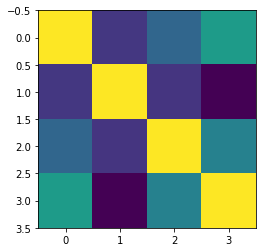

In [ ]:
plt.imshow(titanic.corr())

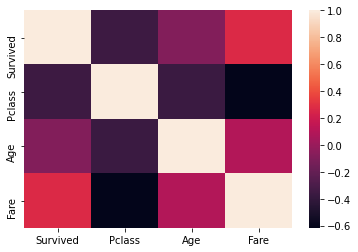

In [ ]:
sns.heatmap(titanic.corr());

In [ ]:
x = np.linspace(0, 5 ,11)
y = x**2
x, y

(array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 array([ 0.  ,  0.25,  1.  ,  2.25,  4.  ,  6.25,  9.  , 12.25, 16.  ,
        20.25, 25.  ]))

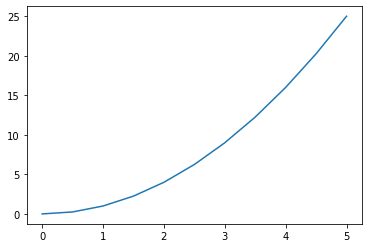

In [ ]:
import matplotlib.pyplot as plt
plt.plot(x,y);

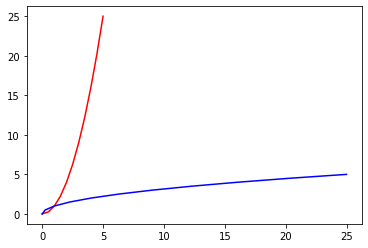

In [ ]:
plt.plot(x,y,'r')
plt.plot(y,x, 'b');

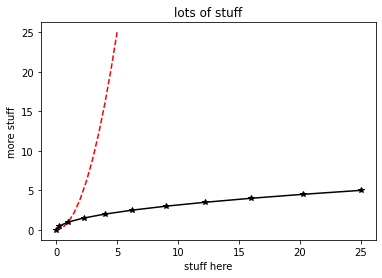

In [ ]:
plt.plot(x,y,'r--')
plt.plot(y,x, 'k*-')
plt.xlabel('stuff here')
plt.ylabel('more stuff')
plt.title('lots of stuff');

''

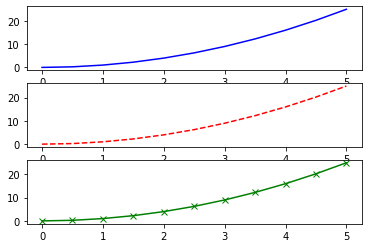

In [ ]:
plt.subplot(3,1,1)
plt.plot(x,y,'b')
plt.subplot(3,1,2)
plt.plot(x,y,'r--')
plt.subplot(3,1,3)
plt.plot(x,y,'g-x')
;

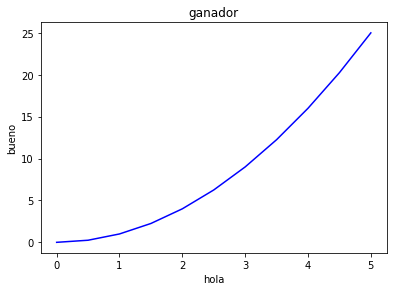

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) 
ax.plot(x,y,'b')
ax.set_xlabel('hola')
ax.set_ylabel('bueno')
ax.set_title('ganador');

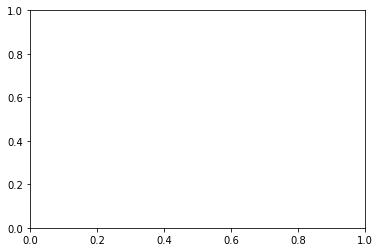

In [ ]:
fig, ax = plt.subplots()

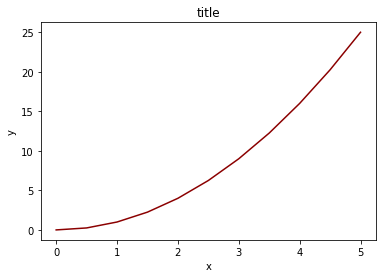

In [ ]:

fig, axes = plt.subplots(nrows=1, ncols=1)

axes.plot(x, y, 'darkred')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

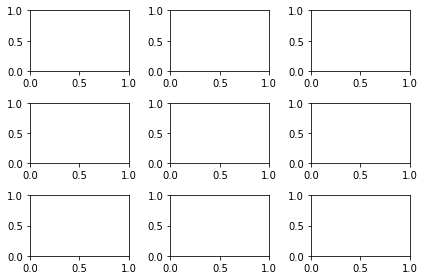

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=3)
fig    
plt.tight_layout()

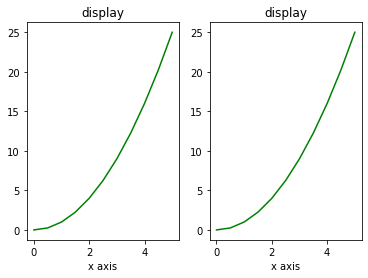

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2)
for ax in axes:
    ax.plot(x, y, 'g')
    ax.set_xlabel('x axis')
    ax.set_title('display')   
plt;

In [ ]:
fig = plt.figure(figsize=(8,4), dpi=100)


<Figure size 800x400 with 0 Axes>

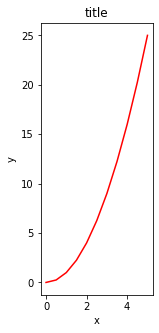

In [ ]:
fig, axes = plt.subplots(figsize=(2,5))

axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

In [ ]:
fig.savefig("filename.png")

In [ ]:
fig.savefig("filename.jpg", dpi=200)

In [ ]:
ax.set_title("title");
ax.set_xlabel("x")
ax.set_ylabel("y");

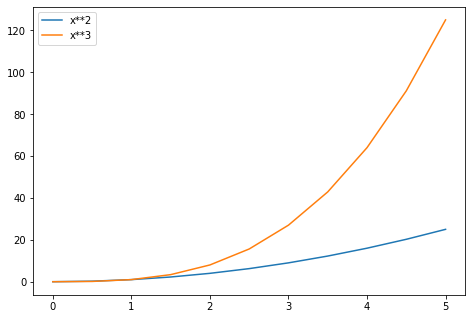

In [ ]:
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])
ax
ax.plot(x, x**2, label="x**2")
ax.plot(x, x**3, label="x**3")
ax.legend();

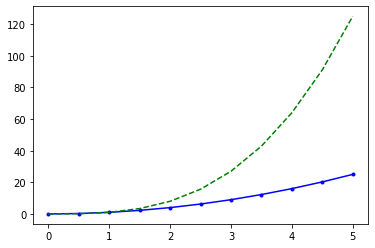

In [ ]:
fig, ax = plt.subplots()
ax.plot(x, x**2, 'b.-') 
ax.plot(x, x**3, 'g--')

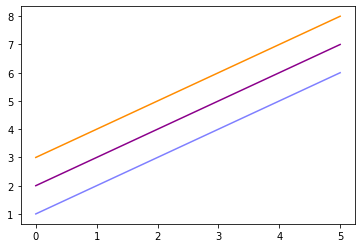

In [ ]:
fig, ax = plt.subplots()
ax.plot(x, x+1, color="blue", alpha=0.5) 
ax.plot(x, x+2, color="#8B008B")      
ax.plot(x, x+3, color="#FF8C00")

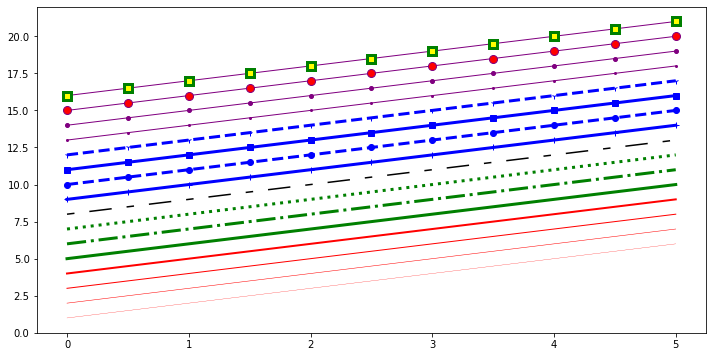

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(x, x+1, color="red", linewidth=0.25)
ax.plot(x, x+2, color="red", linewidth=0.50)
ax.plot(x, x+3, color="red", linewidth=1.00)
ax.plot(x, x+4, color="red", linewidth=2.00)

ax.plot(x, x+5, color="green", lw=3, linestyle='-')
ax.plot(x, x+6, color="green", lw=3, ls='-.')
ax.plot(x, x+7, color="green", lw=3, ls=':')

line, = ax.plot(x, x+8, color="black", lw=1.50)
line.set_dashes([5, 10, 15, 10])

ax.plot(x, x+ 9, color="blue", lw=3, ls='-', marker='+')
ax.plot(x, x+10, color="blue", lw=3, ls='--', marker='o')
ax.plot(x, x+11, color="blue", lw=3, ls='-', marker='s')
ax.plot(x, x+12, color="blue", lw=3, ls='--', marker='1')

ax.plot(x, x+13, color="purple", lw=1, ls='-', marker='o', markersize=2)
ax.plot(x, x+14, color="purple", lw=1, ls='-', marker='o', markersize=4)
ax.plot(x, x+15, color="purple", lw=1, ls='-', marker='o', markersize=8, markerfacecolor="red")
ax.plot(x, x+16, color="purple", lw=1, ls='-', marker='s', markersize=8, 
        markerfacecolor="yellow", markeredgewidth=3, markeredgecolor="green");


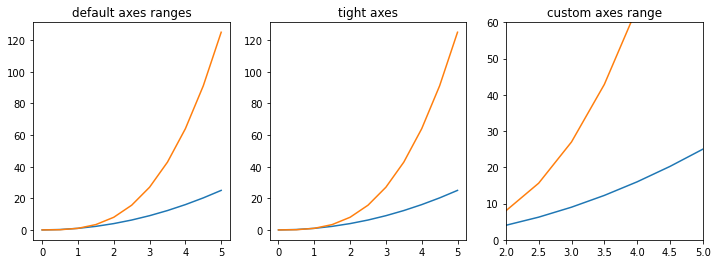

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].plot(x, x**2, x, x**3)
axes[0].set_title("default axes ranges")

axes[1].plot(x, x**2, x, x**3)
axes[1].axis('tight')
axes[1].set_title("tight axes")

axes[2].plot(x, x**2, x, x**3)
axes[2].set_ylim([0, 60])
axes[2].set_xlim([2, 5])
axes[2].set_title("custom axes range");

In [ ]:
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=url, width=400)

display(example)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background']


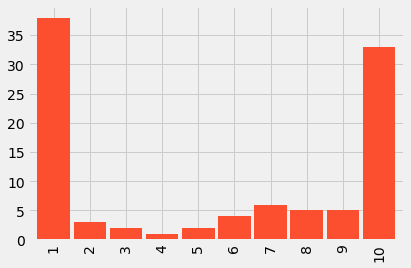

In [ ]:
print(plt.style.available[:5])
plt.style.use('fivethirtyeight')
fake = pd.Series([38, 3, 2, 1, 2, 4, 6, 5, 5, 33], 
                 index=range(1,11))

fake.plot.bar(color='C1', width=0.9);


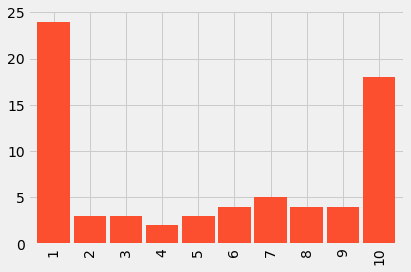

In [ ]:
fake2 = pd.Series(
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
     2, 2, 2, 
     3, 3, 3,
     4, 4,
     5, 5, 5,
     6, 6, 6, 6,
     7, 7, 7, 7, 7,
     8, 8, 8, 8,
     9, 9, 9, 9, 
     10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10])

fake2.value_counts().sort_index().plot.bar(color='C1', width=0.9);

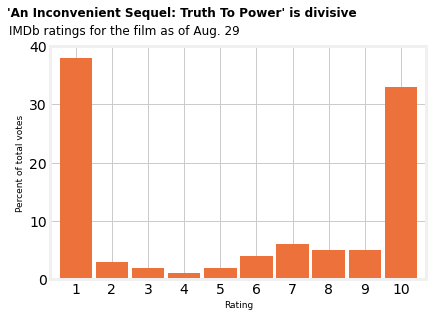

In [ ]:
fig, ax = plt.subplots()
fig.patch.set(facecolor="white")

# Set the bars
fake.plot.bar(width=0.9, color="#ED713A")

ax.set(facecolor="white")

# Set the title and subtitle
ax.set_title("'An Inconvenient Sequel: Truth To Power' is divisive", 
             fontsize=12, 
             x=.35, 
             y=1.1,
             fontweight='bold')
ax.text(s="IMDb ratings for the film as of Aug. 29", fontsize=12, x=-1.85, y=42);

# Set the x and y axes labels
ax.set_xlabel("Rating", fontsize=9)
ax.set_ylabel("Percent of total votes", fontsize=9)

# Fix the x an y axis tick marks and grid
ax.set_xticklabels(range(1,11), rotation=0)
ax.set_yticklabels(range(0,50,10))
ax.set_yticks(range(0,50,10));

In [ ]:
display(example)

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)
lastday = df['2017-08-29']
lastday_filtered = lastday[lastday['category'] == 'IMDb users']
lastday_filtered.tail()





,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-08-29 22:30:06.423181,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 22:40:06.233659,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 22:50:06.592571,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 23:00:05.829558,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 23:10:06.218251,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7


In [ ]:
final = lastday_filtered.tail(1)
final.T

timestamp,2017-08-29 23:10:06.218251
respondents,2662
category,IMDb users
link,http://www.imdb.com/title/tt6322922/ratings
average,5.4
mean,5.6
median,7
1_votes,1021
2_votes,69
3_votes,38
4_votes,25


In [ ]:
pct_columns = ['1_pct', '2_pct', '3_pct', '4_pct', '5_pct',
               '6_pct', '7_pct', '8_pct', '9_pct', '10_pct']
final[pct_columns].T

timestamp,2017-08-29 23:10:06.218251
1_pct,38.4
2_pct,2.6
3_pct,1.4
4_pct,0.9
5_pct,2.1
6_pct,4.1
7_pct,5.8
8_pct,5.5
9_pct,5.5
10_pct,33.7


In [ ]:
plot_data = final[pct_columns].T
plot_data.index = range(1,11)
plot_data.columns = ['percent']
plot_data

,percent
1,38.4
2,2.6
3,1.4
4,0.9
5,2.1
6,4.1
7,5.8
8,5.5
9,5.5
10,33.7


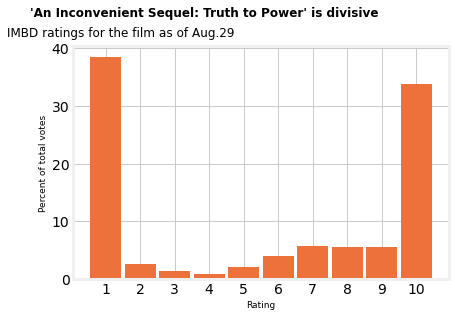

In [ ]:
fig, ax = plt.subplots()
fig.patch.set(facecolor="white")
ax.bar(x=range(1,11), height=plot_data['percent'], width=0.9, color="#ED713A")
ax.set(facecolor="white")
ax.set_title("'An Inconvenient Sequel: Truth to Power' is divisive", 
             fontsize=12,
             x=.35,
             y=1.1,
             fontweight='bold')
ax.text(s="IMBD ratings for the film as of Aug.29", fontsize=12, x=-1.85, y=42)

ax.set_xlabel("Rating", fontsize=9)
ax.set_ylabel("Percent of total votes", fontsize=9)

ax.set_xticklabels(range(1,11), rotation=0)
ax.set_xticks(range(1,11))
ax.set_yticklabels(range(0,50,10))
ax.set_yticks(range(0,50,10)); 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
#Reproduce 538 dataset 
url = 'https://raw.githubusercontent.com/fivethirtyeight/covid-19-polls/master/covid_concern_polls_adjusted.csv'
polls = pd.read_csv(url)
polls

,subject,modeldate,party,startdate,enddate,pollster,grade,samplesize,population,weight,influence,multiversions,tracking,very,somewhat,not_very,not_at_all,very_adjusted,somewhat_adjusted,not_very_adjusted,not_at_all_adjusted,timestamp,url
0,concern-economy,5/18/2020,all,1/27/2020,1/29/2020,Morning Consult,B/C,2202.0,a,0.518043,0.000000,NaN,NaN,19.0,33.0,23.0,11.0,15.159012,36.751414,26.166671,12.230469,14:30:09 18 May 2020,https://morningconsult.com/wp-content/uploads/...
1,concern-economy,5/18/2020,all,1/31/2020,2/2/2020,Morning Consult,B/C,2202.0,a,0.468917,0.000000,NaN,NaN,26.0,32.0,25.0,7.0,22.159012,35.751414,28.166671,8.230469,14:30:09 18 May 2020,https://morningconsult.com/wp-content/uploads/...
2,concern-economy,5/18/2020,all,2/7/2020,2/9/2020,Morning Consult,B/C,2200.0,a,0.431695,0.000000,NaN,NaN,23.0,32.0,24.0,9.0,19.159012,35.751414,27.166671,10.230469,14:30:09 18 May 2020,https://morningconsult.com/wp-content/uploads/...
3,concern-economy,5/18/2020,all,2/13/2020,2/18/2020,Kaiser Family Foundation,NaN,1207.0,a,1.866967,0.000000,NaN,NaN,22.0,35.0,28.0,15.0,26.412708,33.308489,25.990014,13.752440,14:30:09 18 May 2020,http://files.kff.org/attachment/Topline-KFF-He...
4,concern-economy,5/18/2020,all,2/24/2020,2/26/2020,Morning Consult,B/C,2200.0,a,0.294082,0.000000,NaN,NaN,32.0,37.0,18.0,6.0,28.159012,40.751414,21.166671,7.230468,14:30:09 18 May 2020,https://morningconsult.com/wp-content/uploads/...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,concern-infected,5/18/2020,all,5/11/2020,5/13/2020,YouGov,B-,2000.0,a,0.491626,0.447906,NaN,NaN,32.0,40.0,18.0,9.0,35.098988,38.321795,16.525309,9.655674,14:30:11 18 May 2020,https://drive.google.com/file/d/1uFybAzWKhjq0M...
231,concern-infected,5/18/2020,all,5/9/2020,5/16/2020,Optimus,C/D,893.0,a,0.390294,0.373531,NaN,T,28.6,37.6,20.9,12.4,29.940582,35.805734,20.310892,13.399151,14:30:11 18 May 2020,https://github.com/optimus-forecasting-and-pol...
232,concern-infected,5/18/2020,all,5/11/2020,5/14/2020,Global Strategy Group/GBAO/Navigator Research,NaN,252.5,rv,0.076616,0.073284,NaN,T,38.0,35.0,18.5,9.0,34.576132,36.886977,18.211283,10.316785,14:30:11 18 May 2020,https://navigatorresearch.org/wp-content/uploa...
233,concern-infected,5/18/2020,all,5/12/2020,5/15/2020,Global Strategy Group/GBAO/Navigator Research,NaN,1011.0,rv,0.317862,0.317862,NaN,T,40.5,32.0,18.0,9.5,37.076132,33.886977,17.711283,10.816785,14:30:11 18 May 2020,https://navigatorresearch.org/wp-content/uploa...


In [ ]:
polls.describe()

,samplesize,weight,influence,multiversions,very,somewhat,not_very,not_at_all,very_adjusted,somewhat_adjusted,not_very_adjusted,not_at_all_adjusted
count,235.000000,235.000000,235.000000,0.0,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000
mean,1141.180730,0.482759,0.077294,NaN,37.652426,35.599745,17.574043,7.787149,37.961340,35.118148,17.537956,8.222300
std,1636.975706,0.533752,0.173007,NaN,12.957360,5.810639,7.791626,4.543099,12.566510,4.609489,7.175906,4.459725
min,167.166670,0.040227,0.000000,NaN,10.000000,19.000000,2.000000,1.000000,13.098988,21.873764,5.166671,1.111456
25%,340.666670,0.113210,0.000000,NaN,29.750000,33.000000,12.000000,4.000000,31.040582,33.147598,11.419380,4.508550
50%,1000.000000,0.293873,0.008657,NaN,37.000000,36.000000,18.000000,7.000000,34.838245,35.886977,18.037864,8.316785
75%,1500.000000,0.601204,0.066993,NaN,45.000000,40.000000,21.500000,9.500000,49.239087,38.070257,21.211283,10.316785
max,22921.000000,2.200542,1.445472,NaN,73.000000,48.000000,43.000000,24.000000,68.159012,44.801139,41.525309,22.655674


In [ ]:
polls['subject'].value_counts().sort_index()

concern-economy      82
concern-infected    153
Name: subject, dtype: int64

In [ ]:
polls.columns

Index(['subject', 'modeldate', 'party', 'startdate', 'enddate', 'pollster',
       'grade', 'samplesize', 'population', 'weight', 'influence',
       'multiversions', 'tracking', 'very', 'somewhat', 'not_very',
       'not_at_all', 'very_adjusted', 'somewhat_adjusted', 'not_very_adjusted',
       'not_at_all_adjusted', 'timestamp', 'url'],
      dtype='object')

In [ ]:
polls['samplesize'].value_counts().head()

1000.0    18
1500.0    15
2200.0    14
252.5      6
255.5      5
Name: samplesize, dtype: int64

In [ ]:
polls['subject'].value_counts().head()

concern-infected    153
concern-economy      82
Name: subject, dtype: int64

In [ ]:
polls.isnull().sum()

subject                  0
modeldate                0
party                    0
startdate                0
enddate                  0
pollster                 0
grade                  103
samplesize               0
population               0
weight                   0
influence                0
multiversions          235
tracking               149
very                     0
somewhat                 0
not_very                 0
not_at_all               0
very_adjusted            0
somewhat_adjusted        0
not_very_adjusted        0
not_at_all_adjusted      0
timestamp                0
url                      0
dtype: int64

In [ ]:
#No missing data for the columns I want to use

In [ ]:
sm_polls = polls[['subject', 'startdate', 'enddate', 'samplesize', 'very', 'somewhat', 'not_very', 'not_at_all']]
sm_polls.head()

,subject,startdate,enddate,samplesize,very,somewhat,not_very,not_at_all
0,concern-economy,1/27/2020,1/29/2020,2202.0,19.0,33.0,23.0,11.0
1,concern-economy,1/31/2020,2/2/2020,2202.0,26.0,32.0,25.0,7.0
2,concern-economy,2/7/2020,2/9/2020,2200.0,23.0,32.0,24.0,9.0
3,concern-economy,2/13/2020,2/18/2020,1207.0,22.0,35.0,28.0,15.0
4,concern-economy,2/24/2020,2/26/2020,2200.0,32.0,37.0,18.0,6.0


In [ ]:
sm_polls_op = polls[['very', 'somewhat', 'not_very', 'not_at_all', 'enddate']]
sm_polls_op.head()

,very,somewhat,not_very,not_at_all
0,19.0,33.0,23.0,11.0
1,26.0,32.0,25.0,7.0
2,23.0,32.0,24.0,9.0
3,22.0,35.0,28.0,15.0
4,32.0,37.0,18.0,6.0


In [ ]:
economy = sm_polls['subject'] == 'concern-economy'
economy

0       True
1       True
2       True
3       True
4       True
       ...  
230    False
231    False
232    False
233    False
234    False
Name: subject, Length: 235, dtype: bool

In [ ]:
data = sm_polls[economy]
data.head(50)

,subject,startdate,enddate,samplesize,very,somewhat,not_very,not_at_all
0,concern-economy,1/27/2020,1/29/2020,2202.00000,19.0,33.0,23.0,11.0
1,concern-economy,1/31/2020,2/2/2020,2202.00000,26.0,32.0,25.0,7.0
2,concern-economy,2/7/2020,2/9/2020,2200.00000,23.0,32.0,24.0,9.0
3,concern-economy,2/13/2020,2/18/2020,1207.00000,22.0,35.0,28.0,15.0
4,concern-economy,2/24/2020,2/26/2020,2200.00000,32.0,37.0,18.0,6.0
5,concern-economy,2/27/2020,2/27/2020,1051.00000,41.0,37.0,14.0,5.0
6,concern-economy,2/28/2020,3/1/2020,2201.00000,38.0,33.0,13.0,5.0
7,concern-economy,3/2/2020,3/3/2020,866.00000,36.0,36.0,21.0,6.0
8,concern-economy,3/3/2020,3/5/2020,1990.00000,38.0,37.0,12.0,5.0
9,concern-economy,3/2/2020,3/5/2020,3744.00000,34.0,40.0,19.0,6.0


In [ ]:
#Filtered for concern-economy only 
#change dtype to %?


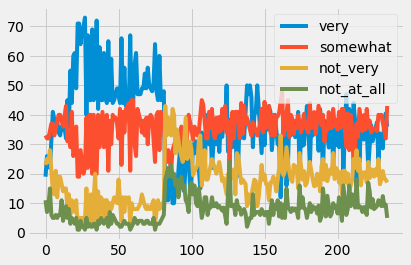

In [ ]:
import matplotlib.pyplot as plt

sm_polls_op.plot()


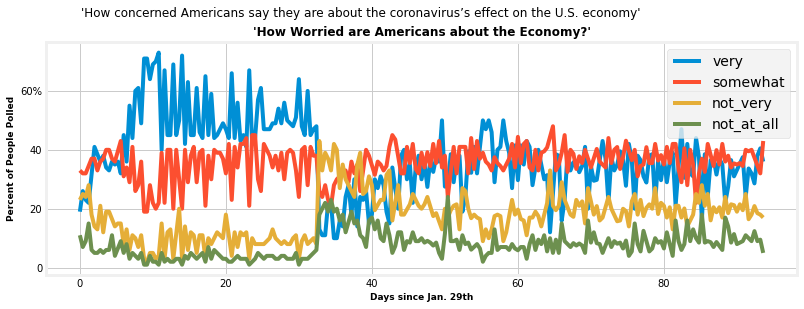

In [ ]:

plt.style.use('fivethirtyeight')

fig = plt.figure()
ax = plt.axes()
fig = plt.gcf()
fig.set_size_inches(12,4)

ax.plot(sm_polls_op)

fig.patch.set(facecolor='white')

ax.set(facecolor='white')

ax.set_title("'How Worried are Americans about the Economy?'", fontsize=12, fontweight='bold') 
ax.text(s="'How concerned Americans say they are about the coronavirus’s effect on the U.S. economy'", x=0.5, y=85.05, fontsize=12)

ax.set_ylabel('Percent of People Polled', fontsize=9, fontweight='bold')
ax.set_xlabel('Days since Jan. 29th', fontsize=9, fontweight='bold')

ax.set_yticklabels(['0', '20', '40', '60%', '80', '100%'], fontsize=10)
ax.set_yticks(range(0,75,20))
plt.legend(['very','somewhat','not_very','not_at_all'])



ax.set_xticklabels(['0', '0', '20', '40', '60', '80'], rotation='horizontal', fontsize=10)
fig.show()

In [ ]:
#Set figure size, popped the subtitle in, albeit wrong place, legend in upper right
#When I try to manipulate the x and y data it messes up the graph and the data disappears - note to self: solve this. 


# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [ ]:
url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/thanksgiving-2015/thanksgiving-2015-poll-data.csv'
df = pd.read_csv(url)
df.head()

,RespondentID,Do you celebrate Thanksgiving?,What is typically the main dish at your Thanksgiving dinner?,What is typically the main dish at your Thanksgiving dinner? - Other (please specify),How is the main dish typically cooked?,How is the main dish typically cooked? - Other (please specify),What kind of stuffing/dressing do you typically have?,What kind of stuffing/dressing do you typically have? - Other (please specify),What type of cranberry saucedo you typically have?,What type of cranberry saucedo you typically have? - Other (please specify),Do you typically have gravy?,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Brussel sprouts,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Carrots,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Cauliflower,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Corn,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Cornbread,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Fruit salad,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Green beans/green bean casserole,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Macaroni and cheese,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Mashed potatoes,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Rolls/biscuits,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Squash,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Vegetable salad,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Yams/sweet potato casserole,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Other (please specify),Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Other (please specify).1,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Apple,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Buttermilk,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Cherry,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Chocolate,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Coconut cream,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Key lime,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Peach,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Pecan,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Pumpkin,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Sweet Potato,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - None,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Other (please specify),Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Other (please specify).1,Which of these desserts do you typically have at Thanksgiving dinner? Please select all that apply. - Apple cobbler,Whic

In [ ]:
# More Work Here
